#### CLASS: CSE7345
#### SMUID: 47812509
#### Quest 9 - Regression and Performace 

In [68]:
#basic imports
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
# read csv file
df = pd.read_csv('q9data.csv',names = ['Yvalue', 'Xvalue'])
#values stored in x & y
y=df['Yvalue'].tolist()
x=df['Xvalue'].tolist()

#### Part A

In [70]:
# function to calculate variance
def variance(a):
    total = 0.0
    for x in a:
        total = total + (x - np.mean(a))**2
    return total / len(a)
var=variance(x)

In [71]:
# function to calculate covariance
def covariance(a,b):
    total = 0.0
    for (x,y) in zip(a,b):
        total = total + (x - np.mean(a))*(y - np.mean(b))
    return total/ len(a)
cov=covariance(x,y)

In [72]:
#calculating slope, slope=covariance/variance
slopeA=cov/var

#calculating yintercept
yintercept = np.mean(y) - (slopeA * np.mean(x))

In [73]:
#Lets print all the calculated values
print ("X population variance:",var)
print ("Population covariance:",cov)
print ("Slope: ",slopeA)
print ("Yintercept: ",yintercept)

X population variance: 24.700113196145736
Population covariance: 5.896497001952007
Slope:  0.23872348094631848
Yintercept:  -0.2761803298869643


In [74]:
# Calculating error for line given points
# using Sum of squares Error equation
def compute_error_line_given_points(b,m,var1,var2):
    length= (len(var1))
    total=0.0
    for x,y in zip(var1,var2):
        total+=(y-(m*x+b))**2
    return total/length
equation=compute_error_line_given_points(yintercept,slopeA,x,y)
print ("Sum of squares Error equation is: ",equation)

Sum of squares Error equation is:  0.06553910081936437


#### Part B

In [75]:
# Step gradient is used to calculate the steep slope in descend from the current position
# Using Partial derivative w.r.t m and b
def step_gradient(b_current,m_current,x_array,y_array,learning_rate):
    b_gradient=0
    m_gradient=0
    N=float(len(x_array))
    for x,y in zip(x_array,y_array):
        b_gradient += -(2/N)*((y-(m_current*x+b_current)))
        m_gradient += -(2/N)*x*(y-(m_current*x+b_current))
        new_b = b_current - (learning_rate*b_gradient)
        new_m = m_current - (learning_rate*m_gradient)
    return [new_b,new_m]

In [76]:
# This function uses step gradient function to run the iterations
# The iteration amount is given to this function as parameter
def gradient_descent_runner(x,y,starting_b,starting_m,learning_rate,num_iterations):
    b=starting_b
    m=starting_m
    for i in range(num_iterations):    
        b,m=step_gradient(b,m,x,y,learning_rate)
    return [b,m]

In [77]:
# Calculating error for line given points
def compute_error_line_given_points(b,m,var1,var2):
    length= (len(var1))
    total=0.0
    for x,y in zip(var1,var2):
        total+=(y-(m*x+b))**2
    return total/length

In [78]:
# Different values for learning rate
learningrate=[0.001,0.0001,0.0003,0.0005]
slopelist=[]
yinterceptlist=[]

#calculate and print all the values using different learning rates 
for lr in learningrate:
    finalvals=gradient_descent_runner(x,y,1,2,lr,10000)
    equationB=compute_error_line_given_points(yinterceptB,slopeB,x,y)
    slopelist.append(finalvals[1])
    yinterceptlist.append(finalvals[0])
    
    print ("Y-intercept for {0}: {1}".format(lr,finalvals[0]))
    print ("Slope for {0}: {1} ".format(lr,finalvals[1]))
    print ("Sum of squares Error equation is: ",equationB)
    print ("\n")

Y-intercept for 0.001: -0.26154480223134613
Slope for 0.001: 0.23750443519276404 
Sum of squares Error equation is:  0.0655858850302454


Y-intercept for 0.0001: 0.45070346718340293
Slope for 0.0001: 0.1781787143347787 
Sum of squares Error equation is:  0.0655858850302454


Y-intercept for 0.0003: 0.02904513076172635
Slope for 0.0003: 0.21330015420089407 
Sum of squares Error equation is:  0.0655858850302454


Y-intercept for 0.0005: -0.14802288937110672
Slope for 0.0005: 0.228048786646022 
Sum of squares Error equation is:  0.0655858850302454




#### Comparing PartA and PartB using Scatter plot

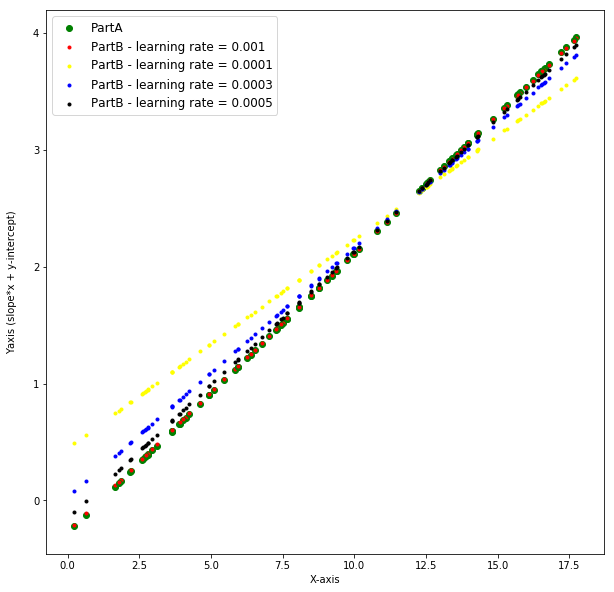

In [79]:
#Comparing values form Part A and Part B
#The formula for computing linear regression:
#y = mx + b where m is slope & b is Yintercept
plt.figure(figsize=(10,10))
color=['red','yellow','blue','black']
for j in range(len(learningrate)):
    for i in x:
        if j==0:
            #computing linear regression for PartA values
            ya=(slopeA*i)+yintercept
            if i == x[0]:
                plt.scatter(i,ya,c='green',label='PartA')
            else:
                plt.scatter(i,ya,c='green')
                
        #computing linear regression for PartB values   
        yb=(slopelist[j]*i)+yinterceptlist[j]
        if i == x[0]:
            plt.scatter(i,yb,c=color[j],s=9,label='PartB - learning rate = {}'.
                        format(learningrate[j]))
        else:
            plt.scatter(i,yb,c=color[j],s=9)
        plt.xlabel("X-axis")
        plt.ylabel("Yaxis (slope*x + y-intercept)\n")
    plt.plot(label="PartB")
    plt.legend(prop={'size':12})
    plt.plot()

#### How close can you get to your results from part A?
The above scatter plot compares the PartA result with PartB. Using different learning curves to compare with the value of PartA, it was noticed that using learning curve values from 0.001 to 0.005, the results are close and overlap with the PartA. This is specially when iterations is given as 10,000. If the learning rate is reduced then we need to increase the iteratations to get the values closed to the correct value.

#### Explain the effect of different learning rates on obtaining values that are closest to the values obtained from partA.

It is observed that the values are almost same as the correct value when the learning curve is 0.001 Also, i tested with learning curve as 0.005 in which the values were also very close. However the learning curve with less value i.e. 0.0001, in this case the values are far away from the correct values. But if the the iterations are increased then the value will get close.